In [84]:
import torch as to
to.set_printoptions(precision=3)
to.autograd.set_detect_anomaly(True)
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Example 1
β = 0.95
r = 0.1
a0 = 10
T = 1
a = to.ones(T+1)
a[0] = a0
a = a.reshape(-1, 1)
print(a)

tensor([[10.],
        [ 1.]])


In [119]:
# Shallow Neural Network
cpolicy = to.nn.Sequential(to.nn.Linear(1, 1))
input = to.rand(11, 1)
input.shape, cpolicy(input).shape

(torch.Size([11, 1]), torch.Size([11, 1]))

In [141]:
-1000 * cpolicy(a0)>a0 * (cpolicy(a0)<0)

tensor([[False]])

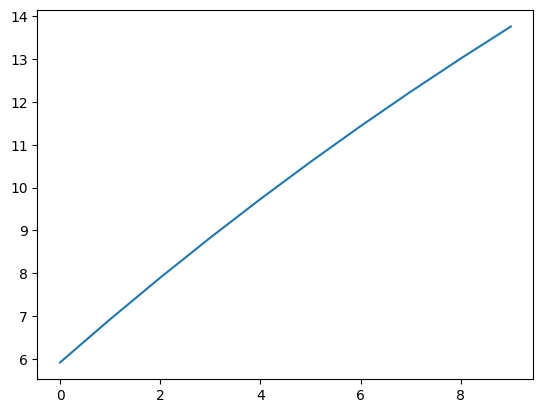

In [125]:
obj_val = []
a0=to.tensor(10.0).reshape(1,-1)
for i in range(10):
    loss = to.tensor(0.0).reshape(1,1)
    loss = -(cpolicy(a0)+β*cpolicy(r*(a0-cpolicy(a0)))+to.where((cpolicy(a0)>a0) & (cpolicy(a0)<0),-1000))
    obj_val.append(-loss.item())
    optimizer = to.optim.SGD(cpolicy.parameters(), lr=0.01)
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
plt.plot(obj_val)

In [126]:
cpolicy(a0), cpolicy(r*(a0-cpolicy(a0)))

(tensor([[14.826]], grad_fn=<AddmmBackward0>),
 tensor([[-0.362]], grad_fn=<AddmmBackward0>))

In [73]:
loss = to.tensor(0.0).reshape(1,1)
loss = cpolicy(a[0])+β*cpolicy(r*(a[0]-cpolicy(a[0])))

In [69]:
loss = to.tensor(0.0).reshape(1,1)
for t in range(T):
    a[t+1] = r*(a[t]-cpolicy(a[t]))
    loss += (β**t)*cpolicy(a[t])
    print(t, a[t].item(), a[t+1].item(),loss.item())
print(loss)

0 10.0 0.618694007396698 3.8130598068237305
1 0.618694007396698 -0.05029570683836937 4.878628253936768
2 -0.05029570683836937 -0.09800198674201965 5.7177042961120605
3 -0.09800198674201965 -0.10140396654605865 6.503092288970947
4 -0.10140396654605865 -0.10164656490087509 7.248415946960449
5 -0.10164656490087509 -0.10166386514902115 7.956419467926025
6 -0.10166386514902115 -0.10166510194540024 8.629018783569336
7 -0.10166510194540024 -0.1016651913523674 9.267988204956055
8 -0.1016651913523674 -0.1016651913523674 9.875009536743164
9 -0.1016651913523674 -0.1016651913523674 10.451679229736328
10 -0.1016651913523674 -0.1016651913523674 10.999515533447266
11 -0.1016651913523674 -0.1016651913523674 11.519960403442383
12 -0.1016651913523674 -0.1016651913523674 12.014382362365723
13 -0.1016651913523674 -0.1016651913523674 12.48408317565918
14 -0.1016651913523674 -0.1016651913523674 12.930299758911133
15 -0.1016651913523674 -0.1016651913523674 13.354205131530762
16 -0.1016651913523674 -0.1016651

In [88]:
for i in range(10):
    loss = to.tensor(0.0).reshape(1,1)
    loss = -cpolicy(a[0])-β*cpolicy(r*(a[0]-cpolicy(a[0])))
    print(-loss.item())
    optimizer = to.optim.SGD(cpolicy.parameters(), lr=0.01)
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()

10.260541915893555
8.668085098266602
7.134973526000977
5.658967018127441
4.237910747528076
2.869731903076172
1.552435278892517
0.28410065174102783
-0.9371193647384644
-2.1130025386810303
-3.2452597618103027
-4.335537433624268
-5.385418891906738
-6.39642858505249
-7.3700337409973145
-8.307644844055176
-9.21062183380127
-10.080269813537598
-10.917847633361816
-11.724564552307129
-12.501585960388184
-13.250033378601074
-13.97098159790039
-14.665470123291016
-15.334498405456543
-15.979024887084961
-16.599977493286133
-17.198244094848633
-17.774677276611328
-18.330106735229492
-18.86532211303711
-19.381084442138672
-19.878131866455078
-20.35717010498047
-20.818876266479492
-21.263904571533203
-21.692886352539062
-22.106426239013672
-22.50510597229004
-22.889488220214844
-23.260108947753906
-23.617488861083984
-23.962133407592773
-24.29451560974121
-24.615100860595703
-24.924335479736328
-25.222646713256836
-25.510446548461914
-25.78813362121582
-26.056087493896484
-26.31467628479004
-26.564